In [7]:
import numpy as np
from numpy.linalg import inv, pinv, norm, cond
from matplotlib import pyplot as plt


In [8]:
# ns = [int(n) for n in np.logspace(1,3,8)]
n = 100
k = 1
lamda = 0.1
scale = 1
e2s = np.logspace(-10,10,20)
e1 = 0
title_str = f'back_error_n={n}_k={k}_lambda={lamda}_e1={e1}'

In [9]:
def compute_SMW(n,k,A,B,U,V,lamda,e1,e2,rand_seed=1):
    np.random.seed(rand_seed)
    noise1 = np.random.normal(size=(n,n))
    noise1 *= e1/norm(noise1,ord=2)
    noise2 = np.random.normal(size=(k,k))
    noise2 *= e2/norm(noise2,ord=2)

    A_inv = inv(A)
    A_til_inv = A_inv + noise1
    Z_inv = inv(np.eye(k)+V.T@A_til_inv@U) + noise2
    B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv
    error = norm(B-inv(B_inv_approx),ord=2)
    bound = 4*lamda*e2
    full_bound = 2*norm(A,ord=2)**2*e1 + bound*(cond(V)*norm(inv(A)@B,ord=2) + lamda*e1)**2
    return error,bound,full_bound

In [10]:
errors = np.zeros_like(e2s,dtype=float)
bounds = np.zeros_like(e2s,dtype=float)
full_bounds = np.zeros_like(e2s,dtype=float)

A = np.random.normal(size=(n,n),scale= scale)
U = np.random.normal(size=(n,k))
U /= norm(U, ord=2)
V = np.random.normal(size=(n,k))
V /= norm(V, ord=2)
B = A + lamda*U@V.T

for i,e2 in enumerate(e2s):
    errors[i],bounds[i],full_bounds[i] = compute_SMW(n,k,A,B,np.sqrt(lamda)*U,np.sqrt(lamda)*V,lamda,e1,e2)
    # print("n = %d, k = %d, e1 = %f, e2 = %f, norm(B^-1A) = %f"%(n,k,e1,e2,norm(inv(B)@A,ord=2)))
    # print("error = %f, bound = %f" %(errors[i],bounds[i]))

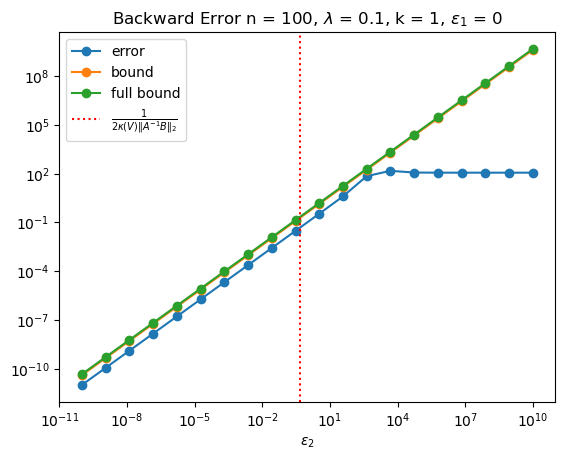

In [11]:
plt.loglog(e2s,errors,label='error',marker='o')
plt.loglog(e2s,bounds,label='bound',marker='o')
plt.loglog(e2s,full_bounds,label='full bound',marker='o')
# plt.loglog(e2s,full_bounds,label='full bound',marker='o')
plt.axvline(x=1/2/cond(V)/norm(inv(A)@B,ord=2),ls=':',color='red',label=r'$\frac{1}{2 \kappa(V)\|A^{-1}B \|_2}$')
plt.legend()
plt.xlabel(r'$\epsilon_2$')
plt.title(f'Backward Error n = {n}, '+r'$\lambda$'+f' = {lamda}, k = {k}, '+r'$\epsilon_1$'+f' = {e1}')  #'Approximation Error of '+r'$B^{-1}$'+'(Forward Error n = '+str(n)+ ' )'
plt.savefig('e1_zero_backward/'+title_str+'.png')
# plt.title(r'$\|{B^{-1}- \left(\widetilde{A}^{-1} -\widetilde{A}^{-1}U Z^{-1} V^T \widetilde{A}^{-1} \right) } \|_2$')


In [12]:
bounds-errors

array([3.00008436e-11, 3.38833862e-10, 3.82507638e-09, 4.31790106e-08,
       4.87421152e-07, 5.50219479e-06, 6.21108563e-05, 7.01130441e-04,
       7.91456999e-03, 8.93355152e-02, 1.00753935e+00, 1.12530219e+01,
       1.02355279e+02, 1.78636618e+03, 2.17074486e+04, 2.46226523e+05,
       2.78065861e+06, 3.13902863e+07, 3.54346604e+08, 3.99999989e+09])